<a href="https://colab.research.google.com/github/yanos84/pca_tutorial/blob/main/labsession_pca.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The first code generates two normal disto x and y and combine them into a matrix data. Then it rotates data to verify if the eigenvectors of the covariance matrix captures the max variance.

[71.45629277 69.95711704] [-69.95711704  71.45629277]
[-1.  1.]


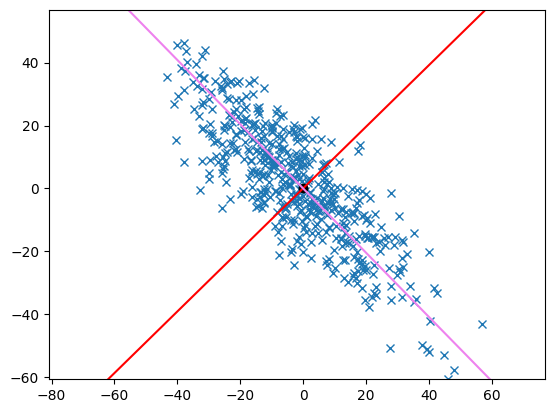

In [1]:
import numpy as np

import matplotlib.pyplot as plt



mean = [0, 0]   # the means is 0 because the rotation of data is a linear transformation and must be done from the origin
cov = [[500, 0], [0, 20]]
x, y = np.random.multivariate_normal(mean, cov, 500).T   # generate two random variables
data = np.array([x,y])  #create the data matrix with 2 variables x and y and 500 objects
rotation = np.array([[0.8, 1],[-0.8, 1.5]])  # apply a rotation with scale
data = np.dot(rotation, data).T
plt.axis('equal')
plt.plot(data[:,1], data[:,0],  'x')
cov = np.dot(data.T, data)
eigen = np.linalg.eig(cov)
v1 = eigen[1][0]*100
v2 = eigen[1][1]*100
print(v1,v2)
plt.xlim(np.min(data), np.max(data))
plt.ylim(np.min(data), np.max(data))
span_line = np.linspace(-1, 1, 2)
print(span_line)
plt.plot(0,0,'ok')
plt.plot( span_line*v1[0], span_line*v1[1],  color='red')
plt.plot( span_line*v2[0], span_line*v2[1],  color='violet')

(3, 3)
eigen values =  [263995.35788261  10036.60905851   4648.98540998]  eigenvectors =  [[ 9.99985769e-01  5.26333221e-03 -8.71350797e-04]
 [ 5.19308173e-03 -9.97736943e-01 -6.70374818e-02]
 [ 1.22221942e-03 -6.70320028e-02  9.97750077e-01]]


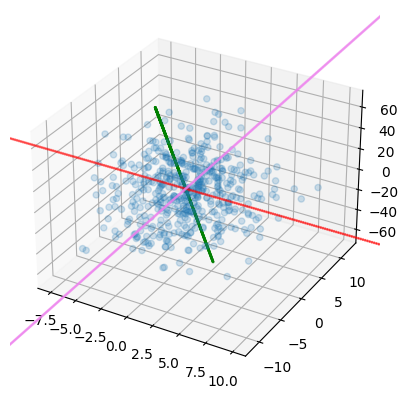

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

mean = [0, 0, 0]   # the means is 0 because the rotation of data is a linear transformation and must be done from the origin
cov = [[500, 0,0], [0, 20,0], [0,0,10]]
x, y, z= np.random.multivariate_normal(mean, cov, 500).T   # generate two random variables
data = np.array([x,y,z]).T
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data[:,2], data[:,1], data[:,0], alpha=0.2)
ax.scatter(0,0,0, 'ok', color = 'red')
ax.set_xlim(np.min(data[:,2]), np.max(data[:,2]))
ax.set_ylim(np.min(data[:,1]), np.max(data[:,1]))
ax.set_zlim(np.min(data[:,0]), np.max(data[:,0]))
#ax.axis('equal')
cov = np.dot(data.T, data)
print(cov.shape)
eigen = np.linalg.eig(cov)
lambdas, vs = np.linalg.eig(cov)
print('eigen values = ', lambdas, ' eigenvectors = ', vs )
v1 = eigen[1][0]*100
v2 = eigen[1][1]*100
v3 = eigen[1][2]*100
span_line = np.linspace(-1, 1, 1000)
ax.scatter( span_line*v1[0], span_line*v1[1],span_line*v1[2], s=1, color='red')
ax.scatter( span_line*v2[0], span_line*v2[1],span_line*v2[2], s=1, color='violet')
ax.scatter( span_line*v3[0], span_line*v3[1],span_line*v3[2], s=1, color='green')

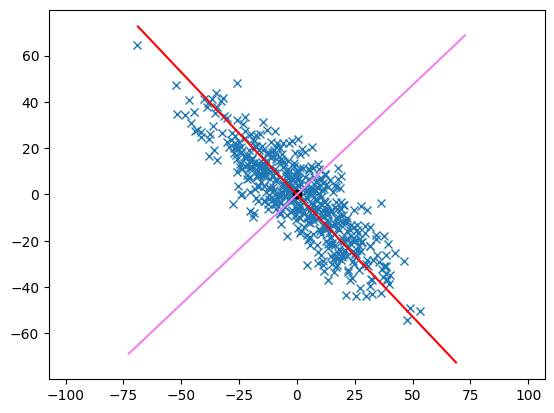

In [3]:
from sklearn.decomposition import PCA

mean = [0, 0]   # the means is 0 because the rotation of data is a linear transformation and must be done from the origin
cov = [[500, 0], [0, 20]]
x, y = np.random.multivariate_normal(mean, cov, 500).T   # generate two random variables
data = np.array([x,y])  #create the data matrix with 2 variables x and y and 500 objects
rotation = np.array([[0.8, 1],[-0.8, 1.5]])  # apply a rotation with scale
data = np.dot(rotation, data).T
pca = PCA(n_components=2)
pca_result = pca.fit(data)
pca_result.components_
plt.plot(data[:,1], data[:,0],  'x')
plt.xlim(np.min(data), np.max(data))
plt.ylim(np.min(data), np.max(data))
span_line = np.linspace(-1, 1, 2)
plt.plot(0,0,'ok')
plt.axis('equal')
plt.plot( span_line*pca_result.components_[0][0]*100, span_line*pca_result.components_[0][1]*100,  color='red')
plt.plot( span_line*pca_result.components_[1][0]*100, span_line*pca_result.components_[1][1]*100,  color='violet')


(array([1., 0., 0., 0., 0., 0., 0., 0., 0., 1.]),
 array([ 59.90779909, 123.58850245, 187.26920582, 250.94990918,
        314.63061255, 378.31131591, 441.99201927, 505.67272264,
        569.353426  , 633.03412937, 696.71483273]),
 <BarContainer object of 10 artists>)

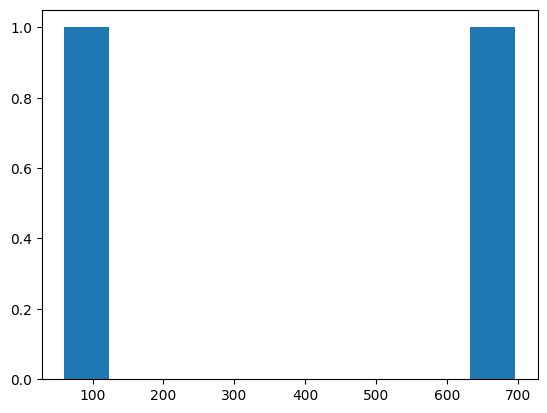

In [4]:
a = np.ravel(pca.explained_variance_)
a.shape
plt.hist(a)

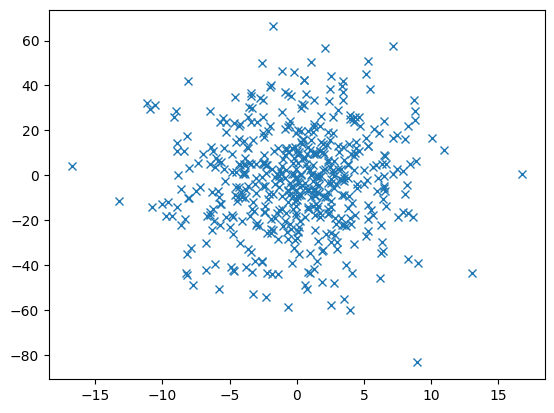

In [5]:
import numpy as np

import matplotlib.pyplot as plt



mean = [0, 0]   # the means is 0 because the rotation of data is a linear transformation and must be done from the origin
cov = [[500, 0], [0, 20]]
x, y = np.random.multivariate_normal(mean, cov, 500).T   # generate two random variables
data = np.array([x,y]).T  #create the data matrix with 2 variables x and y and 500 objects
plt.plot(data[:,1], data[:,0],  'x')